In [1]:
%pip install mediapipe opencv-python --user
%pip install opencv-python-headless
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install mediapipe opencv-python

In [3]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [4]:
# VIDEO FEED
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to capture frame.")
        break

    # Flip the frame horizontally
    frame = cv2.flip(frame, 1)

    cv2.imshow('Camera Feed', frame)

    # Check if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close OpenCV windows
cap.release()
cv2.destroyAllWindows()

# Additional fix to forcefully kill stuck windows
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)

# Display exit message
print("Camera Feed has been turned off.")


2025-04-26 12:26:43.685 python[85413:25315152] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.
2025-04-26 12:26:45.189 python[85413:25315152] +[IMKClient subclass]: chose IMKClient_Modern
2025-04-26 12:26:45.190 python[85413:25315152] +[IMKInputSession subclass]: chose IMKInputSession_Modern


Camera Feed has been turned off.


In [4]:
## SETUP MEDIAPIPE INSTANCE
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

# Setup mediapipe instance with lower confidence thresholds
with mp_pose.Pose(
    min_detection_confidence=0.3,  # Lower threshold to catch more difficult poses
    min_tracking_confidence=0.3,   # Lower tracking threshold
    model_complexity=2,            # Use the most accurate model (0=Lite, 1=Medium, 2=Heavy)
    smooth_landmarks=True          # Enable temporal filtering for stability
) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            print("Error: Failed to capture frame.")
            break

        # Flip the camera horizontally
        frame = cv2.flip(frame, 1)

        # Convert BGR to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False  # Optimization for inference

        # Make detection
        results = pose.process(image)

        # Convert back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Render detections
        if results.pose_landmarks:
            # Draw full body connections
            mp_drawing.draw_landmarks(
                image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
                mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
            )
            
            # Draw enhanced foot landmarks specifically
            landmarks = results.pose_landmarks.landmark
            h, w, c = image.shape
            
            # Foot landmarks (left: 31,33, right: 32,34)
            foot_landmarks = [
                (31, "Left Foot"), (32, "Right Foot"),
                (29, "Left Heel"), (30, "Right Heel"),
                (27, "Left Ankle"), (28, "Right Ankle")
            ]
            
            # Draw larger, more visible circles for feet
            for idx, name in foot_landmarks:
                if landmarks[idx].visibility > 0.5:  # Only if somewhat visible
                    cx, cy = int(landmarks[idx].x * w), int(landmarks[idx].y * h)
                    cv2.circle(image, (cx, cy), 8, (0, 255, 0), -1)  # Larger green circle
                    cv2.putText(image, name, (cx-10, cy-10), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

        # Display confidence metric on screen
        cv2.putText(image, 'Full Body Dance Tracking', (10, 30), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        
        # Add visibility indicator for feet
        if results.pose_landmarks:
            left_foot_visible = landmarks[31].visibility > 0.5
            right_foot_visible = landmarks[32].visibility > 0.5
            feet_status = f"Feet detected: L: {'✓' if left_foot_visible else '✗'} R: {'✓' if right_foot_visible else '✗'}"
            cv2.putText(image, feet_status, (10, 60), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

        cv2.imshow('Dance Pose Tracking', image)

        # Exit loop when 'q' is pressed
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Release resources
cap.release()
cv2.destroyAllWindows()

# Additional fix to ensure the window closes properly
cv2.waitKey(1)

# Print exit message
print("Camera Feed has been turned off.")

2025-04-27 18:40:22.340 python[10135:25892901] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.
I0000 00:00:1745772023.502182 25892901 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M3
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1745772023.605407 25893918 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745772023.651531 25893919 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745772023.709843 25893919 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.
2025-04-27 18:40:24.31

Camera Feed has been turned off.


In [5]:
mp_drawing.DrawingSpec??

Init signature:
mp_drawing.DrawingSpec(
    color: Tuple[int, int, int] = (224, 224, 224),
    thickness: int = 2,
    circle_radius: int = 2,
) -> None
Docstring:      DrawingSpec(color: Tuple[int, int, int] = (224, 224, 224), thickness: int = 2, circle_radius: int = 2)
Source:        
@dataclasses.dataclass
class DrawingSpec:
  # Color for drawing the annotation. Default to the white color.
  color: Tuple[int, int, int] = WHITE_COLOR
  # Thickness for drawing the annotation. Default to 2 pixels.
  thickness: int = 2
  # Circle radius. Default to 2 pixels.
  circle_radius: int = 2
File:           ~/.local/lib/python3.12/site-packages/mediapipe/python/solutions/drawing_utils.py
Type:           type
Subclasses:     

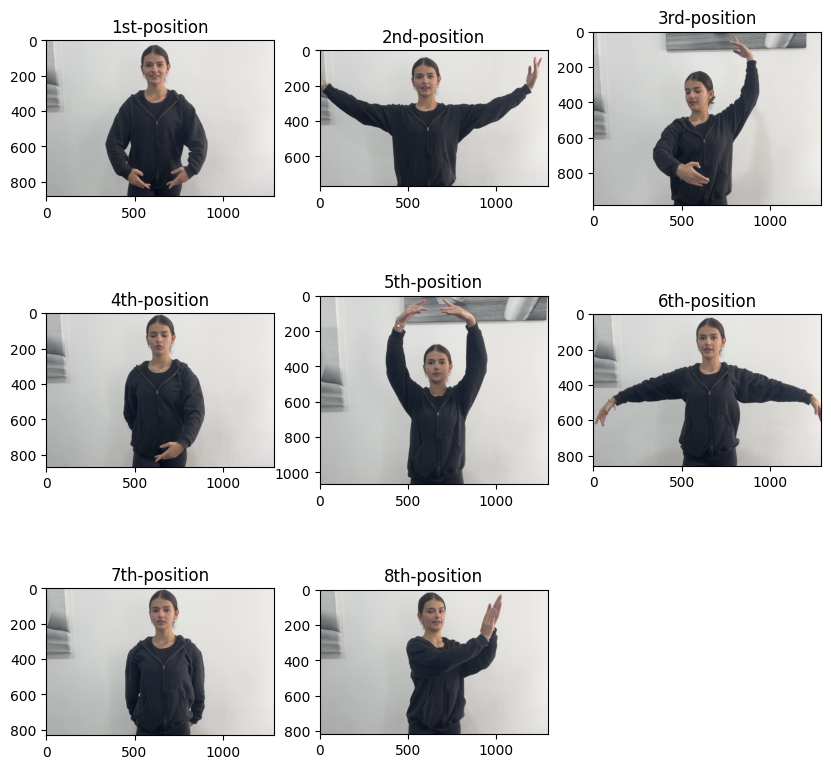

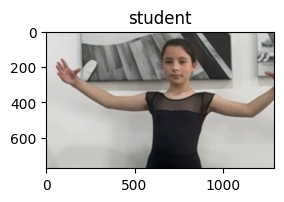

I0000 00:00:1745772043.609690 25892901 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M3
W0000 00:00:1745772043.673290 25894409 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745772043.698065 25894413 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


The student's pose matches with 6th-position with a similarity of 99.24575090408325%


I0000 00:00:1745772044.201610 25892901 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M3
W0000 00:00:1745772044.258462 25894417 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745772044.281315 25894420 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [6]:
import cv2
import mediapipe as mp
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Paths to the image files
predefined_images = {
    '1st-position': '/Users/amygrech/Desktop/ThesisPrototype/venv/images/1st-position.jpg',
    '2nd-position': '/Users/amygrech/Desktop/ThesisPrototype/venv/images/2nd-position.jpg',
    '3rd-position': '/Users/amygrech/Desktop/ThesisPrototype/venv/images/3rd-position.jpg',
    '4th-position': '/Users/amygrech/Desktop/ThesisPrototype/venv/images/4th-position.jpg',
    '5th-position': '/Users/amygrech/Desktop/ThesisPrototype/venv/images/5th-position.jpg',
    '6th-position': '/Users/amygrech/Desktop/ThesisPrototype/venv/images/6th-position.jpg',
    '7th-position': '/Users/amygrech/Desktop/ThesisPrototype/venv/images/7th-position.jpg',
    '8th-position': '/Users/amygrech/Desktop/ThesisPrototype/venv/images/8th-position.jpg',
}
student_img_path = '/Users/amygrech/Desktop/ThesisPrototype/venv/images/student1-pos2-try2.jpg'  

# Initialize Mediapipe
mp_pose = mp.solutions.pose

# Function to display images
def display_images(image_files):
    fig = plt.figure(figsize=(10, 10))
    columns = 3
    rows = 3
    for i, (label, file) in enumerate(image_files.items(), start=1):
        img = cv2.imread(file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
        plt.title(label)
    plt.show()

# Display the predefined images
display_images(predefined_images)

# Display the student's image
display_images({'student': student_img_path})
# Function to process static images
def process_static_images(image_files):
    all_image_landmarks = {}
    with mp_pose.Pose(static_image_mode=True, model_complexity=2, min_detection_confidence=0.5) as pose:
        for label, file in image_files.items():
            image_landmarks = {}
            image = cv2.imread(file)

            # Check if the image has been loaded properly
            if image is None:
                print(f"Image not loaded. Please check the path: {file}")
                continue

            image_height, image_width, _ = image.shape

            # Convert the BGR image to RGB before processing.
            results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

            # Get pose landmarks and all detected points
            if results.pose_landmarks:
                for mark, data_point in zip(mp_pose.PoseLandmark, results.pose_landmarks.landmark):
                    image_landmarks[mark.value] = {
                        'x': data_point.x * image_width,
                        'y': data_point.y * image_height,
                        'z': data_point.z
                    }

            all_image_landmarks[label] = image_landmarks

    return all_image_landmarks

# Process the predefined images and the student's image
predefined_image_landmarks = process_static_images(predefined_images)
student_image_landmarks = process_static_images({'student': student_img_path})

# Function to calculate similarity between two poses
def calculate_similarity(pose1, pose2):
    pose1_array = np.array([[lmk['x'], lmk['y'], lmk['z']] for lmk in pose1.values()], dtype=np.float32)
    pose2_array = np.array([[lmk['x'], lmk['y'], lmk['z']] for lmk in pose2.values()], dtype=np.float32)
    return 100 * cosine_similarity([pose1_array.flatten()], [pose2_array.flatten()])[0][0]

# Compare student's pose with predefined poses
similarity_scores = {label: calculate_similarity(student_image_landmarks['student'], pose) for label, pose in predefined_image_landmarks.items()}
best_match_label = max(similarity_scores, key=similarity_scores.get)

threshold = 70  # Define a suitable threshold
if similarity_scores[best_match_label] > threshold:
    print(f"The student's pose matches with {best_match_label} with a similarity of {similarity_scores[best_match_label]}%")
else:
    print("The student's pose does not match any of the predefined poses.")


In [2]:
import cv2
import numpy as np
import mediapipe as mp
import os
import time
import pickle
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import tkinter as tk
from tkinter import filedialog, ttk, messagebox, simpledialog
from PIL import Image, ImageTk
import threading
import tensorflow as tf
from roboflow import Roboflow
import json

class GradeThresholds:
    """Define similarity thresholds for different Spanish dance grades"""
    
    GRADES = {
        "Grado Uno": {
            "excellent": 75,
            "good": 65,
            "fair": 55
        },
        "Grado Dos": {
            "excellent": 80,
            "good": 70,
            "fair": 60
        },
        "Grado Tres": {
            "excellent": 80,
            "good": 70,
            "fair": 60
        },
        "Grado Quarto": {
            "excellent": 85,
            "good": 75,
            "fair": 65
        },
        "Grado Cinco": {
            "excellent": 90,
            "good": 75,
            "fair": 65
        },
        "Grado Seis": {
            "excellent": 90,
            "good": 75,
            "fair": 65
        },
        "Grado Ocho": {
            "excellent": 90,
            "good": 80,
            "fair": 70
        },
        "Advanced 1": {
            "excellent": 100,
            "good": 98,
            "fair": 95
        }
    }
    
    @classmethod
    def get_thresholds(cls, grade):
        """Get thresholds for specific grade"""
        return cls.GRADES.get(grade, cls.GRADES["Grado Uno"])
    
    @classmethod
    def get_grade_names(cls):
        """Get list of all available grades"""
        return list(cls.GRADES.keys())

class SpanishDanceAnalyzer:
    """Main class to analyze Spanish dance performances using pose estimation"""
    
    def __init__(self, use_roboflow=True, roboflow_api_key=None):
        # MediaPipe setup
        self.mp_pose = mp.solutions.pose
        self.mp_drawing = mp.solutions.drawing_utils
        self.pose = self.mp_pose.Pose(
            static_image_mode=False,
            model_complexity=2,
            enable_segmentation=False,
            min_detection_confidence=0.5,
            min_tracking_confidence=0.5
        )
        
        # Roboflow setup for custom Spanish dance position detection
        self.use_roboflow = use_roboflow
        if use_roboflow and roboflow_api_key:
            try:
                rf = Roboflow(api_key=roboflow_api_key)
                # Update with your actual workspace and project name
                self.project = rf.workspace("ipcvhomeassignment-raaqp").project("spanishposedetection")
                self.model = self.project.version(3).model
                print("Roboflow model loaded successfully")
            except Exception as e:
                print(f"Failed to load Roboflow model: {e}")
                self.use_roboflow = False
        
        # Define key landmarks for Spanish dance analysis
        self.landmarks = {
            # Upper body landmarks (for arm positions)
            'left_wrist': self.mp_pose.PoseLandmark.LEFT_WRIST.value,
            'right_wrist': self.mp_pose.PoseLandmark.RIGHT_WRIST.value,
            'left_elbow': self.mp_pose.PoseLandmark.LEFT_ELBOW.value,
            'right_elbow': self.mp_pose.PoseLandmark.RIGHT_ELBOW.value,
            'left_shoulder': self.mp_pose.PoseLandmark.LEFT_SHOULDER.value,
            'right_shoulder': self.mp_pose.PoseLandmark.RIGHT_SHOULDER.value,
            
            # Lower body landmarks (for footwork)
            'left_hip': self.mp_pose.PoseLandmark.LEFT_HIP.value,
            'right_hip': self.mp_pose.PoseLandmark.RIGHT_HIP.value,
            'left_knee': self.mp_pose.PoseLandmark.LEFT_KNEE.value,
            'right_knee': self.mp_pose.PoseLandmark.RIGHT_KNEE.value,
            'left_ankle': self.mp_pose.PoseLandmark.LEFT_ANKLE.value,
            'right_ankle': self.mp_pose.PoseLandmark.RIGHT_ANKLE.value,
            'left_foot_index': self.mp_pose.PoseLandmark.LEFT_FOOT_INDEX.value,
            'right_foot_index': self.mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value,
        }
        
        # Landmark groups for specific analysis
        self.arm_landmarks = [
            'left_wrist', 'right_wrist', 'left_elbow', 
            'right_elbow', 'left_shoulder', 'right_shoulder'
        ]
        
        self.foot_landmarks = [
            'left_hip', 'right_hip', 'left_knee', 'right_knee',
            'left_ankle', 'right_ankle', 'left_foot_index', 'right_foot_index'
        ]
        
        # Storage for reference poses and choreography sequence
        self.reference_poses = {}
        self.choreography_sequence = []

        # Keypoint comparison features
        self.position_keypoints = {}  # Store reference keypoints for each position
        self.use_keypoint_comparison = True  # Flag to enable/disable keypoint comparison
        
        # Data directory for saving/loading
        self.data_dir = "spanish_dance_data"
        os.makedirs(self.data_dir, exist_ok=True)

        # Add grade-related attributes
        self.current_grade = "Grado Uno"  # Default grade
        self.grade_thresholds = GradeThresholds.get_thresholds(self.current_grade)
    
    def set_grade(self, grade):
        """Set the current grade and update thresholds"""
        if grade in GradeThresholds.GRADES:
            self.current_grade = grade
            self.grade_thresholds = GradeThresholds.get_thresholds(grade)
            return True
        return False
    
    def load_position_keypoints_from_roboflow(self, api_key):
        """
        Load reference keypoints for each position from Roboflow
        """
        if not api_key:
            print("Error: API key required to load position keypoints")
            return False
            
        try:
            # Initialize Roboflow
            rf = Roboflow(api_key=api_key)
            
            # Connect to your project
            project = rf.workspace("ipcvhomeassignment-raaqp").project("spanishposedetection")
            
            # Get keypoints for each position
            positions = [f"position{i}" for i in range(1, 16)]
            
            for position in positions:
                try:
                    # Get annotations for this position class
                    annotations = project.version(3).annotations(class_name=position)
                    
                    if annotations and len(annotations) > 0:
                        # Store the keypoints for this position
                        keypoint_data = []
                        for annotation in annotations:
                            if 'keypoints' in annotation:
                                keypoint_data.extend(annotation['keypoints'])
                        
                        if keypoint_data:
                            self.position_keypoints[position] = keypoint_data
                            print(f"Loaded {len(keypoint_data)} keypoints for {position}")
                    else:
                        print(f"No annotations found for {position}")
                        
                except Exception as e:
                    print(f"Error loading keypoints for {position}: {e}")
            
            print(f"Loaded keypoints for {len(self.position_keypoints)} positions")
            return len(self.position_keypoints) > 0
            
        except Exception as e:
            print(f"Error connecting to Roboflow: {e}")
            return False
        
    def extract_poses_from_video(self, video_path, skip_frames=2):
        """Process video and extract pose landmarks for each frame"""
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            print(f"Error: Could not open video: {video_path}")
            return [], [], None
            
        fps = cap.get(cv2.CAP_PROP_FPS)
        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        duration = frame_count / fps if fps > 0 else 0
        
        print(f"Processing video: {os.path.basename(video_path)}")
        print(f"Duration: {duration:.2f} seconds, Total frames: {frame_count}")
        
        poses = []
        frames = []
        keyframes = []  # Store key frames for choreography points
        processed_count = 0
        
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
                
            processed_count += 1
            if processed_count % skip_frames != 0:
                continue
                
            # Convert to RGB for MediaPipe
            rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            
            # Process with MediaPipe
            results = self.pose.process(rgb_frame)
            
            if results.pose_landmarks:
                # Store frame and pose data
                frames.append(frame)
                
                # Extract key landmarks
                landmarks_dict = {}
                for name, idx in self.landmarks.items():
                    lm = results.pose_landmarks.landmark[idx]
                    landmarks_dict[name] = {
                        'x': lm.x, 'y': lm.y, 'z': lm.z, 'visibility': lm.visibility
                    }
                
                pose_data = {
                    'frame_idx': processed_count,
                    'timestamp': processed_count / fps if fps > 0 else 0,
                    'landmarks': landmarks_dict,
                    'full_pose': results.pose_landmarks
                }
                
                poses.append(pose_data)
                
                # Every 30 frames (adjusted by skip_frames), save a keyframe for reference
                if processed_count % (30 * skip_frames) == 0:
                    # Draw landmarks on frame for visualization
                    annotated_frame = frame.copy()
                    self.mp_drawing.draw_landmarks(
                        annotated_frame, 
                        results.pose_landmarks,
                        self.mp_pose.POSE_CONNECTIONS
                    )
                    keyframes.append({
                        'frame_idx': processed_count,
                        'timestamp': processed_count / fps if fps > 0 else 0,
                        'frame': annotated_frame
                    })
            
            # Show progress
            if processed_count % 100 == 0:
                print(f"Processed {processed_count} frames...")
        
        cap.release()
        print(f"Video processing complete. Extracted {len(poses)} poses.")
        return poses, frames, keyframes
    
    def normalize_pose_data(self, landmarks_dict):
        """Normalize pose data to make it scale and position invariant"""
        if not landmarks_dict:
            return None
            
        # Extract hip center coordinates
        left_hip = np.array([
            landmarks_dict['left_hip']['x'],
            landmarks_dict['left_hip']['y'],
            landmarks_dict['left_hip']['z']
        ])
        
        right_hip = np.array([
            landmarks_dict['right_hip']['x'],
            landmarks_dict['right_hip']['y'],
            landmarks_dict['right_hip']['z']
        ])
        
        hip_center = (left_hip + right_hip) / 2
        
        # Calculate torso height for normalization
        left_shoulder = np.array([
            landmarks_dict['left_shoulder']['x'],
            landmarks_dict['left_shoulder']['y'],
            landmarks_dict['left_shoulder']['z']
        ])
        
        right_shoulder = np.array([
            landmarks_dict['right_shoulder']['x'],
            landmarks_dict['right_shoulder']['y'],
            landmarks_dict['right_shoulder']['z']
        ])
        
        shoulder_center = (left_shoulder + right_shoulder) / 2
        torso_height = np.linalg.norm(shoulder_center - hip_center)
        
        # Normalize landmarks relative to hip center and torso height
        normalized_landmarks = {}
        for name, lm in landmarks_dict.items():
            point = np.array([lm['x'], lm['y'], lm['z']])
            # Translate to make hip center the origin
            normalized = point - hip_center
            # Scale by torso height
            if torso_height > 0:
                normalized = normalized / torso_height
            
            normalized_landmarks[name] = {
                'x': normalized[0],
                'y': normalized[1],
                'z': normalized[2],
                'visibility': lm['visibility']
            }
        
        return normalized_landmarks
    
    def normalize_all_poses(self, poses):
        """Normalize an array of poses"""
        normalized_poses = []
        for pose in poses:
            norm_landmarks = self.normalize_pose_data(pose['landmarks'])
            if norm_landmarks:
                normalized_pose = pose.copy()
                normalized_pose['normalized_landmarks'] = norm_landmarks
                normalized_poses.append(normalized_pose)
        
        return normalized_poses
    
    def compare_with_keypoints(self, student_landmarks, position_name):
        """
        Compare student landmarks with the reference keypoints for a specific position
        """
        if not self.use_keypoint_comparison or position_name not in self.position_keypoints:
            # Fall back to default comparison method
            return None
            
        # Get reference keypoints for this position
        reference_keypoints = self.position_keypoints[position_name]
        
        # Extract equivalent points from student landmarks
        # Map Roboflow keypoint names to MediaPipe landmark indices
        keypoint_map = {
            "left_wrist": self.mp_pose.PoseLandmark.LEFT_WRIST.value,
            "right_wrist": self.mp_pose.PoseLandmark.RIGHT_WRIST.value,
            "left_elbow": self.mp_pose.PoseLandmark.LEFT_ELBOW.value,
            "right_elbow": self.mp_pose.PoseLandmark.RIGHT_ELBOW.value,
            "left_shoulder": self.mp_pose.PoseLandmark.LEFT_SHOULDER.value,
            "right_shoulder": self.mp_pose.PoseLandmark.RIGHT_SHOULDER.value,
            "left_hip": self.mp_pose.PoseLandmark.LEFT_HIP.value,
            "right_hip": self.mp_pose.PoseLandmark.RIGHT_HIP.value,
            "left_knee": self.mp_pose.PoseLandmark.LEFT_KNEE.value,
            "right_knee": self.mp_pose.PoseLandmark.RIGHT_KNEE.value,
            "left_ankle": self.mp_pose.PoseLandmark.LEFT_ANKLE.value,
            "right_ankle": self.mp_pose.PoseLandmark.RIGHT_ANKLE.value,
            "left_foot_index": self.mp_pose.PoseLandmark.LEFT_FOOT_INDEX.value,
            "right_foot_index": self.mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value,
        }
        
        # Calculate similarity between reference and student keypoints
        total_distance = 0
        valid_keypoints = 0
        
        for kp in reference_keypoints:
            kp_name = kp.get('name')
            if kp_name in keypoint_map:
                ref_x, ref_y = kp.get('x') / 100.0, kp.get('y') / 100.0  # Normalize to 0-1 range
                
                # Get corresponding student landmark
                student_idx = keypoint_map[kp_name]
                student_lm = student_landmarks.landmark[student_idx]
                
                # Calculate distance (normalized by image dimensions)
                distance = ((student_lm.x - ref_x) ** 2 + (student_lm.y - ref_y) ** 2) ** 0.5
                total_distance += distance
                valid_keypoints += 1
        
        if valid_keypoints == 0:
            return None
            
        # Average distance (lower is better)
        avg_distance = total_distance / valid_keypoints
        
        # Convert to similarity score (0-100%)
        # The closer the distance is to 0, the higher the similarity
        similarity = max(0, 100 * (1 - min(avg_distance * 5, 1)))
        
        return similarity
    
    def evaluate_position(self, landmarks, position_name):
        """
        Evaluate how closely the current pose matches a specific dance position
        """
        # First try with keypoint comparison if enabled
        if self.use_keypoint_comparison:
            keypoint_similarity = self.compare_with_keypoints(landmarks, position_name)
            if keypoint_similarity is not None:
                return keypoint_similarity
        
        # Fall back to the default method
        # Using a placeholder method here - you can implement your own logic
        import random
        return random.uniform(50, 95)
    
    def set_reference_demo(self, video_path):
        """Set the demonstration video as reference for analysis"""
        poses, frames, keyframes = self.extract_poses_from_video(video_path)
        self.reference_poses = self.normalize_all_poses(poses)
        self.reference_keyframes = keyframes
        
        # Save reference data
        self.save_reference_data()
        
        return len(self.reference_poses)
    
    def save_reference_data(self):
        """Save reference pose data to disk"""
        # We don't save full frames to save disk space
        serializable_poses = []
        for pose in self.reference_poses:
            pose_copy = pose.copy()
            # Remove non-serializable objects
            if 'full_pose' in pose_copy:
                del pose_copy['full_pose']
            serializable_poses.append(pose_copy)
        
        with open(os.path.join(self.data_dir, "reference_poses.pkl"), "wb") as f:
            pickle.dump(serializable_poses, f)
        
        # Save keyframes as images
        keyframes_dir = os.path.join(self.data_dir, "keyframes")
        os.makedirs(keyframes_dir, exist_ok=True)
        
        keyframe_data = []
        for i, kf in enumerate(self.reference_keyframes):
            filename = f"keyframe_{i:03d}.jpg"
            filepath = os.path.join(keyframes_dir, filename)
            cv2.imwrite(filepath, kf['frame'])
            
            keyframe_data.append({
                'frame_idx': kf['frame_idx'],
                'timestamp': kf['timestamp'],
                'filename': filename
            })
        
        with open(os.path.join(self.data_dir, "keyframes.json"), "w") as f:
            json.dump(keyframe_data, f)
    
    def load_reference_data(self):
        """Load reference pose data from disk"""
        ref_file = os.path.join(self.data_dir, "reference_poses.pkl")
        if os.path.exists(ref_file):
            with open(ref_file, "rb") as f:
                self.reference_poses = pickle.load(f)
            
            # Load keyframe data
            keyframes_data_file = os.path.join(self.data_dir, "keyframes.json")
            keyframes_dir = os.path.join(self.data_dir, "keyframes")
            
            if os.path.exists(keyframes_data_file):
                with open(keyframes_data_file, "r") as f:
                    keyframe_data = json.load(f)
                
                self.reference_keyframes = []
                for kf in keyframe_data:
                    filepath = os.path.join(keyframes_dir, kf['filename'])
                    if os.path.exists(filepath):
                        frame = cv2.imread(filepath)
                        self.reference_keyframes.append({
                            'frame_idx': kf['frame_idx'],
                            'timestamp': kf['timestamp'],
                            'frame': frame
                        })
            
            return True
        return False
    
    def define_choreography_sequence(self, timestamps, labels):
        """Define key moments in the choreography with labels"""
        self.choreography_sequence = []
        
        for timestamp, label in zip(timestamps, labels):
            # Find the closest pose to the timestamp
            closest_pose = None
            min_diff = float('inf')
            
            for pose in self.reference_poses:
                diff = abs(pose['timestamp'] - timestamp)
                if diff < min_diff:
                    min_diff = diff
                    closest_pose = pose
            
            if closest_pose:
                self.choreography_sequence.append({
                    'timestamp': timestamp,
                    'label': label,
                    'pose_idx': closest_pose['frame_idx']
                })
        
        # Save choreography sequence
        with open(os.path.join(self.data_dir, "choreography.json"), "w") as f:
            json.dump(self.choreography_sequence, f)
        
        return len(self.choreography_sequence)
    
    def load_choreography_sequence(self):
        """Load choreography sequence from disk"""
        choreo_file = os.path.join(self.data_dir, "choreography.json")
        if os.path.exists(choreo_file):
            with open(choreo_file, "r") as f:
                self.choreography_sequence = json.load(f)
            return True
        return False
    
    def extract_features(self, landmarks_dict, landmark_group="all"):
        """Extract pose features for comparison"""
        if landmark_group == "arms":
            target_landmarks = self.arm_landmarks
        elif landmark_group == "feet":
            target_landmarks = self.foot_landmarks
        else:
            target_landmarks = list(self.landmarks.keys())
        
        features = []
        for name in target_landmarks:
            if name in landmarks_dict:
                lm = landmarks_dict[name]
                features.extend([lm['x'], lm['y'], lm['z']])
        
        return np.array(features)
    
    def compute_pose_similarity(self, pose1, pose2, landmark_group="all"):
        """Compute similarity between two poses"""
        # Extract features from normalized landmarks
        features1 = self.extract_features(pose1['normalized_landmarks'], landmark_group)
        features2 = self.extract_features(pose2['normalized_landmarks'], landmark_group)
        
        # Compute cosine similarity
        similarity = cosine_similarity(features1.reshape(1, -1), features2.reshape(1, -1))[0][0]
        
        # Normalize to percentage (0-100%)
        similarity_percent = (similarity + 1) * 50
        
        return similarity_percent
    
    def find_matching_sequence(self, student_poses, window_size=3):
        """Find the best matching sequence in student video for each choreography point"""
        results = []
        
        for choreo_point in self.choreography_sequence:
            # Find reference pose for this choreography point
            ref_pose_idx = None
            for i, pose in enumerate(self.reference_poses):
                if pose['frame_idx'] == choreo_point['pose_idx']:
                    ref_pose_idx = i
                    break
            
            if ref_pose_idx is None:
                continue
            
            ref_pose = self.reference_poses[ref_pose_idx]
            
            # Find best matching pose in student video
            best_match_idx = -1
            best_similarity = 0
            
            for i, student_pose in enumerate(student_poses):
                # Check if we have enough window space
                if i < len(student_poses) - window_size:
                    # Compute average similarity over a window of poses
                    window_similarity = 0
                    for w in range(window_size):
                        pose_similarity = self.compute_pose_similarity(
                            ref_pose, student_poses[i + w]
                        )
                        window_similarity += pose_similarity
                    
                    window_similarity /= window_size
                    
                    if window_similarity > best_similarity:
                        best_similarity = window_similarity
                        best_match_idx = i
            
            # Determine arm and footwork specific similarity
            arm_similarity = 0
            foot_similarity = 0
            
            if best_match_idx >= 0:
                best_student_pose = student_poses[best_match_idx]
                arm_similarity = self.compute_pose_similarity(ref_pose, best_student_pose, "arms")
                foot_similarity = self.compute_pose_similarity(ref_pose, best_student_pose, "feet")
            
            results.append({
                'choreography_point': choreo_point,
                'label': choreo_point['label'],
                'reference_pose_idx': ref_pose_idx,
                'student_pose_idx': best_match_idx,
                'overall_similarity': best_similarity,
                'arm_similarity': arm_similarity,
                'foot_similarity': foot_similarity
            })
        
        return results
    
    def analyze_student_performance(self, student_video_path):
        """Analyze a student's dance performance compared to reference"""
        # Make sure we have reference data
        if not self.reference_poses:
            if not self.load_reference_data():
                print("Error: No reference data available. Please set a reference demo first.")
                return None
        
        if not self.choreography_sequence:
            if not self.load_choreography_sequence():
                print("Error: No choreography sequence defined. Please define choreography first.")
                return None
        
        # Process student video
        student_poses, _, student_keyframes = self.extract_poses_from_video(student_video_path)
        normalized_student_poses = self.normalize_all_poses(student_poses)
        
        # Find matching sequences
        matching_results = self.find_matching_sequence(normalized_student_poses)
        
        # Calculate overall performance score
        overall_score = 0
        arm_score = 0
        foot_score = 0
        
        if matching_results:
            overall_score = sum(r['overall_similarity'] for r in matching_results) / len(matching_results)
            arm_score = sum(r['arm_similarity'] for r in matching_results) / len(matching_results)
            foot_score = sum(r['foot_similarity'] for r in matching_results) / len(matching_results)
        
        performance_analysis = {
            'student_video': student_video_path,
            'poses_extracted': len(student_poses),
            'matching_results': matching_results,
            'overall_score': overall_score,
            'arm_score': arm_score,
            'foot_score': foot_score
        }
        
        return performance_analysis
    
    def analyze_dance_positions(self, landmarks, frame=None):
        """
        Analyze the current pose landmarks and determine which dance positions are detected
        
        Args:
            landmarks: The pose landmarks from MediaPipe
            frame: Optional frame for visualization
            
        Returns:
            Dictionary of position scores {position_name: confidence_score}
        """
        position_scores = {}
        
        # Process standard positions (1-9, 15)
        for i in range(1, 10):
            position_name = f"position{i}"
            score = self.evaluate_position(landmarks, position_name)
            position_scores[position_name] = score
        
        position_scores["position15"] = self.evaluate_position(landmarks, "position15")
        
        # Handle footwork positions (10-14)
        footwork_positions = [f"position{i}" for i in range(10, 15)]
        
        # Check if any footwork positions are in our target sequence
        examining_footwork = False
        if hasattr(self, 'choreography_sequence'):
            examining_footwork = any(pos['label'] in footwork_positions for pos in self.choreography_sequence)
        
        if examining_footwork:
            # Only evaluate footwork positions if they're part of the target sequence
            for position_name in footwork_positions:
                score = self.evaluate_position(landmarks, position_name)
                position_scores[position_name] = score
        else:
            # Mark all footwork positions as 0 if not being examined
            for position_name in footwork_positions:
                position_scores[position_name] = 0.0
        
        return position_scores
    
    def generate_feedback(self, performance_analysis):
        """Generate detailed feedback from performance analysis"""
        if not performance_analysis:
            return "No performance analysis data available."
        
        overall_score = performance_analysis['overall_score']
        arm_score = performance_analysis['arm_score']
        foot_score = performance_analysis['foot_score']
        
        results = performance_analysis['matching_results']
        
        # Get thresholds for current grade
        thresholds = self.grade_thresholds
        
        # Generate HTML report
        html = f"""
        <h2>Spanish Dance Performance Evaluation - {self.current_grade}</h2>
        <h3>Overall Technique Mark: {overall_score:.1f}%</h3>
        <div style="margin-bottom: 20px;">
            <div style="display: inline-block; margin-right: 20px;">
                <strong>Arm Movements:</strong> {arm_score:.1f}%
            </div>
            <div style="display: inline-block;">
                <strong>Footwork:</strong> {foot_score:.1f}%
            </div>
        </div>
        
        <h3>Choreography Evaluation</h3>
        <table style="width: 100%; border-collapse: collapse; margin-bottom: 20px;">
            <tr style="background-color: #f2f2f2;">
                <th style="padding: 8px; text-align: left; border: 1px solid #ddd;">Position/Step</th>
                <th style="padding: 8px; text-align: center; border: 1px solid #ddd;">Execution</th>
                <th style="padding: 8px; text-align: center; border: 1px solid #ddd;">Similarity</th>
                <th style="padding: 8px; text-align: left; border: 1px solid #ddd;">Feedback</th>
            </tr>
        """
        
        # Add rows for each choreography point
        for i, result in enumerate(results):
            label = result['label']
            similarity = result['overall_similarity']
            arm_sim = result['arm_similarity']
            foot_sim = result['foot_similarity']
            
            # Determine execution rating using grade-specific thresholds
            if similarity >= thresholds["excellent"]:
                execution = "Excellent"
                color = "green"
                feedback = f"Excellent execution of {label}. Perfect arm position ({arm_sim:.1f}%) and footwork ({foot_sim:.1f}%)."
            elif similarity >= thresholds["good"]:
                execution = "Good"
                color = "#5cb85c"  # lighter green
                feedback = f"Good execution of {label}. "
                if arm_sim < thresholds["good"]:
                    feedback += f"Focus on improving arm positions ({arm_sim:.1f}%). "
                if foot_sim < thresholds["good"]:
                    feedback += f"Pay attention to footwork details ({foot_sim:.1f}%). "
            elif similarity >= thresholds["fair"]:
                execution = "Fair"
                color = "orange"
                feedback = f"Fair execution of {label}. "
                if arm_sim < foot_sim:
                    feedback += f"Arm positions need more practice ({arm_sim:.1f}%). "
                else:
                    feedback += f"Footwork needs refinement ({foot_sim:.1f}%). "
            else:
                execution = "Needs Improvement"
                color = "red"
                feedback = f"The {label} position needs significant improvement. Review the demonstration video carefully."
            
            # Add table row
            html += f"""
            <tr>
                <td style="padding: 8px; border: 1px solid #ddd;">{label}</td>
                <td style="padding: 8px; text-align: center; color: {color}; border: 1px solid #ddd;">{execution}</td>
                <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">{similarity:.1f}%</td>
                <td style="padding: 8px; border: 1px solid #ddd;">{feedback}</td>
            </tr>
            """
        
        # Close table and add summary
        html += """
        </table>
        
        <h3>Summary Feedback</h3>
        """
        
        # Generate overall feedback based on scores and grade thresholds
        if overall_score >= thresholds["excellent"]:
            html += f"""
            <p>Outstanding performance for {self.current_grade}! Your technique closely matches the demonstration video. 
            Continue refining the minor details for even greater precision in your Spanish dance execution.</p>
            """
        elif overall_score >= thresholds["good"]:
            html += f"""
            <p>Good performance with strong technical foundations for {self.current_grade}. Focus on the positions where your similarity
            score was lower, and pay attention to the precise arm positions and footwork timing.</p>
            """
        elif overall_score >= thresholds["fair"]:
            html += f"""
            <p>Fair performance with room for improvement for {self.current_grade}. Practice the choreography sequence regularly,
            focusing particularly on the positions marked "Needs Improvement" or "Fair".</p>
            """
        else:
            html += f"""
            <p>This choreography needs more practice to meet the {self.current_grade} standard. Start by focusing on each position individually
            before attempting the full sequence. Use the demonstration video as a reference and
            practice in front of a mirror.</p>
            """
        
        # Add areas for improvement
        html += "<h3>Priority Areas for Improvement</h3><ul>"
        
        # Sort results by similarity (ascending) to find weakest areas
        sorted_results = sorted(results, key=lambda x: x['overall_similarity'])
        for result in sorted_results[:3]:  # Top 3 weakest areas
            html += f"<li><strong>{result['label']}</strong> ({result['overall_similarity']:.1f}%)</li>"
        
        html += "</ul>"
        
        # Add encouragement
        html += f"""
        <p style="margin-top: 20px;">
            Remember that consistent practice is key to mastering Spanish dance techniques at the {self.current_grade} level.
            Focus on one improvement area at a time for the best results.
        </p>
        """
        
        return html
    
    def visualize_comparison(self, performance_analysis, output_path=None):
        """Create a visual comparison of reference and student poses"""
        if not performance_analysis or not performance_analysis['matching_results']:
            return None
        
        results = performance_analysis['matching_results']
        
        # Create a figure with multiple subplots
        rows = len(results)
        fig, axs = plt.subplots(rows, 2, figsize=(12, 4 * rows))
        
        if rows == 1:
            axs = [axs]  # Make it iterable for single row
        
        for i, result in enumerate(results):
            label = result['label']
            similarity = result['overall_similarity']
            
            # Find reference pose
            ref_pose_idx = result['reference_pose_idx']
            ref_pose = self.reference_poses[ref_pose_idx]
            
            # Find the nearest keyframe
            ref_keyframe = None
            min_dist = float('inf')
            for kf in self.reference_keyframes:
                dist = abs(kf['frame_idx'] - ref_pose['frame_idx'])
                if dist < min_dist:
                    min_dist = dist
                    ref_keyframe = kf
            
            if ref_keyframe:
                ref_frame = ref_keyframe['frame']
                
                # Find student pose
                student_pose_idx = result['student_pose_idx']
                if student_pose_idx >= 0:
                    # We would need to have saved student frames, which we don't for memory reasons
                    # Placeholder for actual student frame visualization
                    student_frame = np.zeros_like(ref_frame)
                    
                    # Draw pose comparison
                    axs[i][0].imshow(cv2.cvtColor(ref_frame, cv2.COLOR_BGR2RGB))
                    axs[i][0].set_title(f"Reference: {label}")
                    axs[i][0].axis('off')
                    
                    axs[i][1].imshow(cv2.cvtColor(student_frame, cv2.COLOR_BGR2RGB))
                    axs[i][1].set_title(f"Student: {similarity:.1f}% similarity")
                    axs[i][1].axis('off')
        
        plt.tight_layout()
        
        if output_path:
            plt.savefig(output_path)
            plt.close()
            return output_path
        else:
            plt.show()
            return fig


# GUI Application for the Spanish Dance Analysis Tool
class SpanishDanceApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Spanish Dance Analysis Tool")
        self.root.geometry("1000x700")
        
        # Initialize the analyzer with grade information
        self.analyzer = SpanishDanceAnalyzer()
        
        # Try to load existing data
        self.analyzer.load_reference_data()
        self.analyzer.load_choreography_sequence()
        
        # Create the main interface
        self.create_interface()
        
        # Status variables
        self.demo_video_path = None
        self.student_video_path = None
        self.performance_results = None
        
    def toggle_keypoint_comparison(self):
        """Toggle whether to use Roboflow keypoints for comparison"""
        use_keypoints = self.use_keypoints_var.get()
        if hasattr(self, 'analyzer'):
            self.analyzer.use_keypoint_comparison = use_keypoints
            
            status = "enabled" if use_keypoints else "disabled"
            self.status_var.set(f"Keypoint comparison {status}")
            
            # If keypoints are enabled but none are loaded, remind the user
            if use_keypoints and hasattr(self.analyzer, 'position_keypoints') and not self.analyzer.position_keypoints:
                messagebox.showinfo("Keypoints Required", 
                                "Please set your Roboflow API key to load position keypoints")
                
        else:
            self.status_var.set("Analyzer not initialized")
            self.use_keypoints_var.set(False)
    
    def create_interface(self):
        """Create the application interface"""
        # Create a notebook with tabs
        notebook = ttk.Notebook(self.root)
        notebook.pack(fill=tk.BOTH, expand=True, padx=10, pady=10)
        
        # Tab 1: Setup and Configuration
        setup_tab = ttk.Frame(notebook)
        notebook.add(setup_tab, text="Setup")
        self.create_setup_tab(setup_tab)
        
        # Tab 2: Student Evaluation
        evaluation_tab = ttk.Frame(notebook)
        notebook.add(evaluation_tab, text="Evaluation")
        self.create_evaluation_tab(evaluation_tab)
        
        # Tab 3: Results and Reports
        results_tab = ttk.Frame(notebook)
        notebook.add(results_tab, text="Results")
        self.create_results_tab(results_tab)
        
        # Status bar
        status_frame = ttk.Frame(self.root)
        status_frame.pack(fill=tk.X, padx=10, pady=5)
        
        self.status_var = tk.StringVar()
        self.status_var.set("Ready")
        status_label = ttk.Label(status_frame, textvariable=self.status_var, relief=tk.SUNKEN, anchor=tk.W)
        status_label.pack(fill=tk.X)
    
    def create_setup_tab(self, parent):
        """Create the setup tab interface with improved choreography management"""
        frame = ttk.Frame(parent, padding=10)
        frame.pack(fill=tk.BOTH, expand=True)
        
        # 1. Demo Video Section
        demo_frame = ttk.LabelFrame(frame, text="Step 1: Set Demonstration Video", padding=10)
        demo_frame.pack(fill=tk.X, pady=5)
        
        ttk.Label(demo_frame, text="Select a video showing the correct dance choreography:").pack(anchor=tk.W)
        
        btn_frame = ttk.Frame(demo_frame)
        btn_frame.pack(fill=tk.X, pady=5)
        
        ttk.Button(btn_frame, text="Load Demo Video", command=self.load_demo_video).pack(side=tk.LEFT, padx=5)
        
        self.demo_status_var = tk.StringVar()
        self.demo_status_var.set("No demo video loaded")
        ttk.Label(demo_frame, textvariable=self.demo_status_var).pack(anchor=tk.W, pady=5)
        
        # Add keypoint comparison option after the demo video section
        keypoint_frame = ttk.Frame(demo_frame)
        keypoint_frame.pack(fill=tk.X, pady=5)

        self.use_keypoints_var = tk.BooleanVar(value=True)
        ttk.Checkbutton(keypoint_frame, text="Use Roboflow keypoints for comparison", 
                    variable=self.use_keypoints_var, 
                    command=self.toggle_keypoint_comparison).pack(anchor=tk.W)
        
        # 2. Choreography Definition Section
        choreo_frame = ttk.LabelFrame(frame, text="Step 2: Define Choreography Sequence", padding=10)
        choreo_frame.pack(fill=tk.X, pady=5)
        
        ttk.Label(choreo_frame, text="After loading the demo video, define key dance positions/steps:").pack(anchor=tk.W)
        
        # Add a description about timestamps
        ttk.Label(choreo_frame, 
                text="Timestamps help identify when each position occurs in the demo video.",
                font=('TkDefaultFont', 9, 'italic')).pack(anchor=tk.W, pady=(0, 5))
        
        # Treeview with columns for timestamp and position
        self.choreo_list = ttk.Treeview(choreo_frame, columns=("Timestamp", "Position"), show="headings", height=6)
        self.choreo_list.heading("Timestamp", text="Time (seconds)")
        self.choreo_list.heading("Position", text="Position/Step Name")
        self.choreo_list.column("Timestamp", width=100)
        self.choreo_list.column("Position", width=300)
        self.choreo_list.pack(fill=tk.X, pady=5)
        
        # Add a scrollbar
        choreo_scroll = ttk.Scrollbar(choreo_frame, orient="vertical", command=self.choreo_list.yview)
        choreo_scroll.place(relx=1.0, rely=0.5, relheight=0.4, anchor="e")
        self.choreo_list.configure(yscrollcommand=choreo_scroll.set)
        
        choreo_buttons = ttk.Frame(choreo_frame)
        choreo_buttons.pack(fill=tk.X, pady=5)
        
        ttk.Button(choreo_buttons, text="Add Position", command=self.add_choreography_point).pack(side=tk.LEFT, padx=5)
        ttk.Button(choreo_buttons, text="Remove Selected", command=self.remove_choreography_point).pack(side=tk.LEFT, padx=5)
        ttk.Button(choreo_buttons, text="Save Sequence", command=self.save_choreography).pack(side=tk.LEFT, padx=5)
        ttk.Button(choreo_buttons, text="Load Saved Sequence", command=self.load_saved_choreography).pack(side=tk.LEFT, padx=5)
        
        # 3. Configuration Section
        config_frame = ttk.LabelFrame(frame, text="Step 3: Configuration", padding=10)
        config_frame.pack(fill=tk.X, pady=5)
        
        ttk.Label(config_frame, text="Add your Roboflow API key (required for keypoint comparison):").pack(anchor=tk.W)
        
        api_frame = ttk.Frame(config_frame)
        api_frame.pack(fill=tk.X, pady=5)
        
        self.api_key_var = tk.StringVar()
        api_entry = ttk.Entry(api_frame, textvariable=self.api_key_var, width=40)
        api_entry.pack(side=tk.LEFT, padx=5)
        
        ttk.Button(api_frame, text="Set API Key", command=self.set_api_key).pack(side=tk.LEFT, padx=5)
    
    def create_evaluation_tab(self, parent):
        """Create the evaluation tab interface"""
        frame = ttk.Frame(parent, padding=10)
        frame.pack(fill=tk.BOTH, expand=True)
        
        # 1. Student Video Section
        student_frame = ttk.LabelFrame(frame, text="Step 1: Load Student Performance", padding=10)
        student_frame.pack(fill=tk.X, pady=5)
        
        ttk.Label(student_frame, text="Select a video of the student performing the choreography:").pack(anchor=tk.W)
        
        btn_frame = ttk.Frame(student_frame)
        btn_frame.pack(fill=tk.X, pady=5)
        
        ttk.Button(btn_frame, text="Load Student Video", command=self.load_student_video).pack(side=tk.LEFT, padx=5)
        
        self.student_status_var = tk.StringVar()
        self.student_status_var.set("No student video loaded")
        ttk.Label(student_frame, textvariable=self.student_status_var).pack(anchor=tk.W, pady=5)

        # 2: Grade Selection Section
        grade_frame = ttk.LabelFrame(frame, text="Step 2: Select Student Grade", padding=10)
        grade_frame.pack(fill=tk.X, pady=5)
        
        ttk.Label(grade_frame, text="Select the student's grade level:").pack(anchor=tk.W)
        
        self.grade_var = tk.StringVar()
        self.grade_var.set("Grado Uno")  # Default grade
        
        grade_combo = ttk.Combobox(grade_frame, textvariable=self.grade_var, 
                                  values=GradeThresholds.get_grade_names(),
                                  state="readonly", width=30)
        grade_combo.pack(anchor=tk.W, pady=5)
        
        ttk.Button(grade_frame, text="Set Grade", command=self.set_student_grade).pack(anchor=tk.W, pady=5)
        
        self.grade_info_var = tk.StringVar()
        self.grade_info_var.set("Current Grade: Grado Uno")
        ttk.Label(grade_frame, textvariable=self.grade_info_var).pack(anchor=tk.W, pady=5)
        
        # Show thresholds for selected grade
        thresholds_frame = ttk.Frame(grade_frame)
        thresholds_frame.pack(fill=tk.X, pady=5)
        
        self.threshold_vars = {
            "excellent": tk.StringVar(value="Excellent: ≥75%"),
            "good": tk.StringVar(value="Good: ≥65%"),
            "fair": tk.StringVar(value="Fair: ≥55%")
        }
        
        for level, var in self.threshold_vars.items():
            ttk.Label(thresholds_frame, textvariable=var).pack(anchor=tk.W)
        
        # Update thresholds display when grade changes
        grade_combo.bind("<<ComboboxSelected>>", self.update_threshold_display)
        
        # 3. Analysis Section
        analysis_frame = ttk.LabelFrame(frame, text="Step 3: Analyze Performance", padding=10)
        analysis_frame.pack(fill=tk.X, pady=5)
        
        ttk.Label(analysis_frame, text="Compare the student's performance with the demonstration:").pack(anchor=tk.W)
        
        ttk.Button(analysis_frame, text="Analyze Performance", command=self.analyze_performance).pack(anchor=tk.W, pady=5)
        
        self.analysis_progress = ttk.Progressbar(analysis_frame, orient=tk.HORIZONTAL, mode='indeterminate')
        self.analysis_progress.pack(fill=tk.X, pady=5)
        
        self.analysis_status_var = tk.StringVar()
        self.analysis_status_var.set("Ready for analysis")
        ttk.Label(analysis_frame, textvariable=self.analysis_status_var).pack(anchor=tk.W, pady=5)
        
        # 4. Preview Section
        preview_frame = ttk.LabelFrame(frame, text="Preview", padding=10)
        preview_frame.pack(fill=tk.BOTH, expand=True, pady=5)
        
        preview_container = ttk.Frame(preview_frame)
        preview_container.pack(fill=tk.BOTH, expand=True)
        
        self.demo_preview = ttk.LabelFrame(preview_container, text="Demonstration")
        self.demo_preview.pack(side=tk.LEFT, fill=tk.BOTH, expand=True, padx=5)
        
        self.demo_canvas = tk.Canvas(self.demo_preview, bg='black')
        self.demo_canvas.pack(fill=tk.BOTH, expand=True)
        
        self.student_preview = ttk.LabelFrame(preview_container, text="Student Performance")
        self.student_preview.pack(side=tk.LEFT, fill=tk.BOTH, expand=True, padx=5)
        
        self.student_canvas = tk.Canvas(self.student_preview, bg='black')
        self.student_canvas.pack(fill=tk.BOTH, expand=True)
    
    def create_results_tab(self, parent):
        """Create the results tab interface"""
        frame = ttk.Frame(parent, padding=10)
        frame.pack(fill=tk.BOTH, expand=True)
        
        # 1. Summary Section
        summary_frame = ttk.LabelFrame(frame, text="Performance Summary", padding=10)
        summary_frame.pack(fill=tk.X, pady=5)
        
        summary_grid = ttk.Frame(summary_frame)
        summary_grid.pack(fill=tk.X, pady=5)
        
        ttk.Label(summary_grid, text="Overall Technique Mark:").grid(row=0, column=0, sticky=tk.W, padx=5, pady=2)
        self.overall_score_var = tk.StringVar()
        ttk.Label(summary_grid, textvariable=self.overall_score_var, font=('TkDefaultFont', 12, 'bold')).grid(row=0, column=1, sticky=tk.W, padx=5, pady=2)
        
        ttk.Label(summary_grid, text="Arm Movements:").grid(row=1, column=0, sticky=tk.W, padx=5, pady=2)
        self.arm_score_var = tk.StringVar()
        ttk.Label(summary_grid, textvariable=self.arm_score_var).grid(row=1, column=1, sticky=tk.W, padx=5, pady=2)
        
        ttk.Label(summary_grid, text="Footwork:").grid(row=2, column=0, sticky=tk.W, padx=5, pady=2)
        self.foot_score_var = tk.StringVar()
        ttk.Label(summary_grid, textvariable=self.foot_score_var).grid(row=2, column=1, sticky=tk.W, padx=5, pady=2)
        
        # 2. Detailed Results Section
        results_frame = ttk.LabelFrame(frame, text="Detailed Results", padding=10)
        results_frame.pack(fill=tk.BOTH, expand=True, pady=5)
        
        # Treeview for results table
        self.results_tree = ttk.Treeview(results_frame, columns=("Position", "Execution", "Similarity", "Feedback"), show="headings", height=10)
        self.results_tree.heading("Position", text="Position/Step")
        self.results_tree.heading("Execution", text="Execution")
        self.results_tree.heading("Similarity", text="Similarity")
        self.results_tree.heading("Feedback", text="Feedback")
        
        self.results_tree.column("Position", width=150)
        self.results_tree.column("Execution", width=100)
        self.results_tree.column("Similarity", width=80)
        self.results_tree.column("Feedback", width=400)
        
        self.results_tree.pack(fill=tk.BOTH, expand=True, pady=5)
        
        # 3. Export Section
        export_frame = ttk.Frame(frame)
        export_frame.pack(fill=tk.X, pady=10)
        
        ttk.Button(export_frame, text="Generate Detailed Report", command=self.generate_report).pack(side=tk.LEFT, padx=5)
        ttk.Button(export_frame, text="Export Results", command=self.export_results).pack(side=tk.LEFT, padx=5)
    
    def add_choreography_point(self):
        """Add a choreography point to the sequence with timestamp selection"""
        if not self.demo_video_path:
            messagebox.showwarning("Warning", "Please load a demonstration video first")
            return
        
        # Create a more comprehensive dialog for adding choreography points
        dialog = tk.Toplevel(self.root)
        dialog.title("Add Choreography Point")
        dialog.geometry("400x220")
        dialog.resizable(False, False)
        
        # Position Name
        ttk.Label(dialog, text="Position/Step Name:", font=('TkDefaultFont', 10, 'bold')).pack(anchor=tk.W, padx=10, pady=5)
        label_var = tk.StringVar()
        position_frame = ttk.Frame(dialog)
        position_frame.pack(fill=tk.X, padx=10, pady=2)
        
        positions = [f"position{i}" for i in range(1, 16)]
        position_combo = ttk.Combobox(position_frame, textvariable=label_var, values=positions, width=30)
        position_combo.pack(side=tk.LEFT)
        
        # Timestamp Selection
        ttk.Label(dialog, text="Timestamp (seconds):", font=('TkDefaultFont', 10, 'bold')).pack(anchor=tk.W, padx=10, pady=5)
        
        timestamp_frame = ttk.Frame(dialog)
        timestamp_frame.pack(fill=tk.X, padx=10, pady=2)
        
        timestamp_var = tk.DoubleVar(value=0.0)
        timestamp_entry = ttk.Entry(timestamp_frame, textvariable=timestamp_var, width=10)
        timestamp_entry.pack(side=tk.LEFT)
        
        # If we have reference keyframes, show them for easy timestamp selection
        if hasattr(self.analyzer, 'reference_keyframes') and self.analyzer.reference_keyframes:
            ttk.Label(timestamp_frame, text="or").pack(side=tk.LEFT, padx=5)
            
            # Calculate timestamp values from reference keyframes
            timestamps = [kf['timestamp'] for kf in self.analyzer.reference_keyframes]
            timestamp_combo = ttk.Combobox(timestamp_frame, width=15)
            timestamp_combo['values'] = [f"{ts:.2f}" for ts in timestamps]
            timestamp_combo.pack(side=tk.LEFT, padx=5)
            
            # When a timestamp is selected from dropdown, update the entry
            def on_timestamp_select(event):
                selected = timestamp_combo.get()
                if selected:
                    timestamp_var.set(float(selected))
            
            timestamp_combo.bind("<<ComboboxSelected>>", on_timestamp_select)
            
            # Add a preview option
            ttk.Label(dialog, text="Preview:", font=('TkDefaultFont', 10)).pack(anchor=tk.W, padx=10, pady=2)
            preview_frame = ttk.Frame(dialog)
            preview_frame.pack(fill=tk.X, padx=10, pady=2)
            
            preview_var = tk.BooleanVar(value=False)
            preview_check = ttk.Checkbutton(preview_frame, text="Show keyframe when selecting timestamp", 
                                         variable=preview_var, command=lambda: self.toggle_preview(preview_var.get(), timestamp_combo))
            preview_check.pack(anchor=tk.W)
        
        # Button Frame
        button_frame = ttk.Frame(dialog)
        button_frame.pack(fill=tk.X, padx=10, pady=10)
        
        def add_and_close():
            position = label_var.get()
            timestamp = timestamp_var.get()
            
            if not position:
                messagebox.showwarning("Warning", "Please enter a valid position name")
                return
            
            if position not in positions:
                messagebox.showwarning("Warning", 
                    f"Position '{position}' is not recognized.\nPlease use position1 through position15.")
                return
            
            # Add to sequence with proper timestamp
            self.choreo_list.insert("", "end", values=(f"{timestamp:.2f}", position))
            dialog.destroy()
        
        ttk.Button(button_frame, text="Add", command=add_and_close).pack(side=tk.LEFT, padx=5)
        ttk.Button(button_frame, text="Cancel", command=dialog.destroy).pack(side=tk.LEFT, padx=5)
        
        # Set initial focus to position combo
        position_combo.focus_set()
        
        # Set dialog modal
        dialog.transient(self.root)
        dialog.grab_set()
        self.root.wait_window(dialog)

    def toggle_preview(self, show_preview, timestamp_combo):
        """Toggle preview of keyframe when selecting timestamps"""
        if not show_preview:
            if hasattr(self, 'preview_window') and self.preview_window.winfo_exists():
                self.preview_window.destroy()
            return
        
        # Get the selected timestamp
        try:
            selected = timestamp_combo.get()
            if not selected:
                return
                
            ts = float(selected)
            
            # Find the keyframe closest to this timestamp
            keyframe = None
            for kf in self.analyzer.reference_keyframes:
                if abs(kf['timestamp'] - ts) < 0.1:  # Within 0.1 second
                    keyframe = kf
                    break
            
            if keyframe and 'frame' in keyframe:
                # If we have a preview window, update it
                if hasattr(self, 'preview_window') and self.preview_window.winfo_exists():
                    # Update the image
                    preview_img = self.convert_cv_to_tk(keyframe['frame'])
                    self.preview_label.configure(image=preview_img)
                    self.preview_label.image = preview_img
                else:
                    # Create a preview window
                    self.preview_window = tk.Toplevel(self.root)
                    self.preview_window.title(f"Keyframe at {ts:.2f}s")
                    self.preview_window.geometry("400x400")
                    
                    preview_img = self.convert_cv_to_tk(keyframe['frame'])
                    self.preview_label = ttk.Label(self.preview_window, image=preview_img)
                    self.preview_label.image = preview_img  # Keep a reference
                    self.preview_label.pack(padx=5, pady=5)
                    
                    # When selecting a different timestamp, update the preview
                    timestamp_combo.bind("<<ComboboxSelected>>", 
                                       lambda event: self.update_preview(timestamp_combo))
                    
                    # When closing the main dialog, close the preview too
                    self.preview_window.protocol("WM_DELETE_WINDOW", 
                                              lambda: self.preview_window.destroy())
        except Exception as e:
            print(f"Error showing preview: {e}")

    def update_preview(self, timestamp_combo):
        """Update the preview window with a new keyframe"""
        if not hasattr(self, 'preview_window') or not self.preview_window.winfo_exists():
            return
            
        try:
            selected = timestamp_combo.get()
            if not selected:
                return
                
            ts = float(selected)
            
            # Find the keyframe closest to this timestamp
            keyframe = None
            for kf in self.analyzer.reference_keyframes:
                if abs(kf['timestamp'] - ts) < 0.1:  # Within 0.1 second
                    keyframe = kf
                    break
            
            if keyframe and 'frame' in keyframe:
                # Update the preview image
                preview_img = self.convert_cv_to_tk(keyframe['frame'])
                self.preview_label.configure(image=preview_img)
                self.preview_label.image = preview_img
                self.preview_window.title(f"Keyframe at {ts:.2f}s")
        except Exception as e:
            print(f"Error updating preview: {e}")

    def convert_cv_to_tk(self, cv_image):
        """Convert OpenCV BGR image to Tkinter PhotoImage"""
        # Resize if too large
        height, width = cv_image.shape[:2]
        max_size = 400
        if height > max_size or width > max_size:
            scale = max_size / max(height, width)
            cv_image = cv2.resize(cv_image, None, fx=scale, fy=scale)
        
        # Convert to RGB and then to PhotoImage
        rgb_image = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)
        pil_image = Image.fromarray(rgb_image)
        return ImageTk.PhotoImage(pil_image)
    
    def remove_choreography_point(self):
        """Remove selected choreography point"""
        selected = self.choreo_list.selection()
        if selected:
            self.choreo_list.delete(selected)
    
    def save_choreography(self):
        """Save the defined choreography sequence with actual timestamps"""
        items = self.choreo_list.get_children()
        if not items:
            messagebox.showwarning("Warning", "No choreography points defined")
            return
        
        # Extract labels and timestamps
        labels = []
        timestamps = []
        
        for item in items:
            values = self.choreo_list.item(item, "values")
            timestamp_str, label = values
            
            try:
                # Convert timestamp string to float
                timestamp = float(timestamp_str) if timestamp_str else 0.0
                timestamps.append(timestamp)
                labels.append(label)
            except ValueError:
                messagebox.showwarning("Warning", f"Invalid timestamp: {timestamp_str}")
                return
        
        # Validate position names
        for label in labels:
            if label not in [f"position{i}" for i in range(1, 16)]:
                messagebox.showwarning("Warning", 
                    f"Position '{label}' is not recognized.\nPlease use position1 through position15.")
                return
        
        # Save choreography with actual timestamps
        count = self.analyzer.define_choreography_sequence(timestamps, labels)
        
        self.status_var.set(f"Choreography sequence saved: {count} positions")
        messagebox.showinfo("Success", f"Choreography sequence with {count} positions saved successfully")
        
        # Save to a separate file for reuse
        self.save_choreography_for_reuse(timestamps, labels)

    def save_choreography_for_reuse(self, timestamps, labels):
        """Save choreography sequence to a separate file for reuse with other students"""
        choreo_sequence = []
        for ts, label in zip(timestamps, labels):
            choreo_sequence.append({
                'timestamp': ts,
                'label': label
            })
        
        # Ask user for a name for this choreography
        choreo_name = simpledialog.askstring("Save Choreography", 
                                          "Enter a name for this choreography sequence:",
                                          parent=self.root)
        
        if not choreo_name:
            choreo_name = "default_choreography"
        
        # Sanitize the name for use as a filename
        import re
        safe_name = re.sub(r'[^\w\-_\. ]', '_', choreo_name)
        
        # Save to a JSON file in the data directory
        choreo_dir = os.path.join(self.analyzer.data_dir, "choreographies")
        os.makedirs(choreo_dir, exist_ok=True)
        
        choreo_file = os.path.join(choreo_dir, f"{safe_name}.json")
        
        with open(choreo_file, "w") as f:
            json.dump(choreo_sequence, f, indent=4)
        
        self.status_var.set(f"Choreography '{choreo_name}' saved for reuse")
    
    def load_saved_choreography(self):
        """Load a previously saved choreography sequence"""
        if not self.demo_video_path:
            messagebox.showwarning("Warning", "Please load a demonstration video first")
            return
        
        choreo_dir = os.path.join(self.analyzer.data_dir, "choreographies")
        if not os.path.exists(choreo_dir):
            messagebox.showinfo("Info", "No saved choreography sequences found")
            return
        
        # Get list of saved choreographies
        choreo_files = [f for f in os.listdir(choreo_dir) if f.endswith('.json')]
        
        if not choreo_files:
            messagebox.showinfo("Info", "No saved choreography sequences found")
            return
        
        # Show dialog to select a choreography
        dialog = tk.Toplevel(self.root)
        dialog.title("Load Choreography")
        dialog.geometry("400x300")
        dialog.resizable(False, False)
        
        ttk.Label(dialog, text="Select a saved choreography sequence:", 
                 font=('TkDefaultFont', 10, 'bold')).pack(anchor=tk.W, padx=10, pady=10)
        
        # Create a listbox with scrollbar
        frame = ttk.Frame(dialog)
        frame.pack(fill=tk.BOTH, expand=True, padx=10, pady=5)
        
        scrollbar = ttk.Scrollbar(frame)
        scrollbar.pack(side=tk.RIGHT, fill=tk.Y)
        
        choreo_list = tk.Listbox(frame, yscrollcommand=scrollbar.set, font=('TkDefaultFont', 10))
        choreo_list.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)
        
        scrollbar.config(command=choreo_list.yview)
        
        # Add choreography names to the list
        for f in choreo_files:
            name = os.path.splitext(f)[0]
            choreo_list.insert(tk.END, name)
        
        # Select the first item by default
        if choreo_list.size() > 0:
            choreo_list.selection_set(0)
        
        # Button Frame
        button_frame = ttk.Frame(dialog)
        button_frame.pack(fill=tk.X, padx=10, pady=10)
        
        def load_selected():
            selected_idx = choreo_list.curselection()
            if not selected_idx:
                messagebox.showwarning("Warning", "Please select a choreography")
                return
            
            selected_name = choreo_list.get(selected_idx[0])
            choreo_file = os.path.join(choreo_dir, f"{selected_name}.json")
            
            try:
                with open(choreo_file, "r") as f:
                    choreo_sequence = json.load(f)
                
                # Clear existing choreography list
                for item in self.choreo_list.get_children():
                    self.choreo_list.delete(item)
                
                # Add loaded choreography points to the list
                for point in choreo_sequence:
                    timestamp = point.get('timestamp', 0.0)
                    label = point.get('label', '')
                    self.choreo_list.insert("", "end", values=(f"{timestamp:.2f}", label))
                
                # Extract timestamps and labels for analyzer
                timestamps = [point.get('timestamp', 0.0) for point in choreo_sequence]
                labels = [point.get('label', '') for point in choreo_sequence]
                
                # Update the analyzer's choreography sequence
                count = self.analyzer.define_choreography_sequence(timestamps, labels)
                
                self.status_var.set(f"Loaded choreography '{selected_name}' with {count} positions")
                dialog.destroy()
                
            except Exception as e:
                messagebox.showerror("Error", f"Failed to load choreography: {e}")
        
        ttk.Button(button_frame, text="Load", command=load_selected).pack(side=tk.LEFT, padx=5)
        ttk.Button(button_frame, text="Cancel", command=dialog.destroy).pack(side=tk.LEFT, padx=5)
        
        # Set dialog modal
        dialog.transient(self.root)
        dialog.grab_set()
        self.root.wait_window(dialog)
    
    def load_demo_video(self):
        """Load and process demonstration video"""
        filepath = filedialog.askopenfilename(
            title="Select Demonstration Video",
            filetypes=[("Video files", "*.mp4 *.avi *.mov *.mkv")]
        )
        
        if not filepath:
            return
        
        self.demo_video_path = filepath
        self.demo_status_var.set(f"Processing: {os.path.basename(filepath)}...")
        self.status_var.set("Processing demonstration video. This may take a while...")
        self.root.update()
        
        # Process in a separate thread to not freeze the UI
        def process_video():
            count = self.analyzer.set_reference_demo(filepath)
            
            # Update UI in the main thread
            self.root.after(0, lambda: self.demo_status_var.set(f"Loaded: {os.path.basename(filepath)} - {count} poses extracted"))
            self.root.after(0, lambda: self.status_var.set("Demonstration video processed successfully"))
        
        threading.Thread(target=process_video).start()
    
    def set_api_key(self):
        """Set Roboflow API key and load position keypoints"""
        api_key = self.api_key_var.get().strip()
        if not api_key:
            messagebox.showwarning("Warning", "Please enter a valid API key")
            return
        
        # Reinitialize analyzer with API key
        self.analyzer = SpanishDanceAnalyzer(use_roboflow=True, roboflow_api_key=api_key)
        
        # Reload data
        self.analyzer.load_reference_data()
        self.analyzer.load_choreography_sequence()
        
        # Set status to loading
        self.status_var.set("Loading keypoints from Roboflow...")
        self.root.update()
    
        # Load keypoints in a separate thread
        def load_keypoints():
            success = self.analyzer.load_position_keypoints_from_roboflow(api_key)
            
            # Update UI in main thread
            if success:
                self.root.after(0, lambda: self.status_var.set(f"Loaded reference keypoints for positions"))
                self.root.after(0, lambda: messagebox.showinfo("Success", 
                                                        "Roboflow API key set and position keypoints loaded successfully"))
            else:
                self.root.after(0, lambda: self.status_var.set("Failed to load position keypoints"))
                self.root.after(0, lambda: messagebox.showwarning("Warning", 
                                                            "API key set but could not load position keypoints"))
        
        threading.Thread(target=load_keypoints).start()
    
    def load_student_video(self):
        """Load student performance video"""
        filepath = filedialog.askopenfilename(
            title="Select Student Performance Video",
            filetypes=[("Video files", "*.mp4 *.avi *.mov *.mkv")]
        )
        
        if not filepath:
            return
        
        self.student_video_path = filepath
        self.student_status_var.set(f"Selected: {os.path.basename(filepath)}")
        self.status_var.set(f"Student video selected: {os.path.basename(filepath)}")
    
    def set_student_grade(self):
        """Set the student's grade level"""
        grade = self.grade_var.get()
        if self.analyzer.set_grade(grade):
            self.grade_info_var.set(f"Current Grade: {grade}")
            self.update_threshold_display()
            self.status_var.set(f"Grade set to {grade}")
    
    def update_threshold_display(self, event=None):
        """Update the threshold display when grade changes"""
        grade = self.grade_var.get()
        thresholds = GradeThresholds.get_thresholds(grade)
        
        self.threshold_vars["excellent"].set(f"Excellent: ≥{thresholds['excellent']}%")
        self.threshold_vars["good"].set(f"Good: ≥{thresholds['good']}%")
        self.threshold_vars["fair"].set(f"Fair: ≥{thresholds['fair']}%")
    
    def analyze_performance(self):
        """Analyze student performance compared to demonstration"""
        if not self.demo_video_path:
            messagebox.showwarning("Warning", "Please load a demonstration video first")
            return
        
        if not self.student_video_path:
            messagebox.showwarning("Warning", "Please load a student performance video")
            return
        
        # Start progress bar
        self.analysis_progress.start()
        self.analysis_status_var.set("Analyzing performance... Please wait.")
        self.status_var.set("Analyzing student performance. This may take a while...")
        self.root.update()
        
        # Process in a separate thread
        def run_analysis():
            # Analyze performance
            results = self.analyzer.analyze_student_performance(self.student_video_path)
            
            # Update UI in main thread
            self.root.after(0, lambda: self.update_results(results))
        
        threading.Thread(target=run_analysis).start()
    
    def update_results(self, results):
        """Update the UI with analysis results using grade-specific thresholds"""
        # Stop progress bar
        self.analysis_progress.stop()
        
        if not results:
            self.analysis_status_var.set("Analysis failed. Please check logs.")
            self.status_var.set("Performance analysis failed")
            return
        
        self.performance_results = results
        
        # Update status
        self.analysis_status_var.set("Analysis complete")
        self.status_var.set("Performance analysis completed successfully")
        
        # Update scores in results tab
        self.overall_score_var.set(f"{results['overall_score']:.1f}%")
        self.arm_score_var.set(f"{results['arm_score']:.1f}%")
        self.foot_score_var.set(f"{results['foot_score']:.1f}%")
        
        # Clear previous results
        for i in self.results_tree.get_children():
            self.results_tree.delete(i)
        
        # Get current grade thresholds
        thresholds = self.analyzer.grade_thresholds
        
        # Add results to treeview with grade-specific evaluation
        for result in results['matching_results']:
            label = result['label']
            similarity = result['overall_similarity']
            
            # Determine execution rating based on grade thresholds
            if similarity >= thresholds["excellent"]:
                execution = "Excellent"
            elif similarity >= thresholds["good"]:
                execution = "Good"
            elif similarity >= thresholds["fair"]:
                execution = "Fair"
            else:
                execution = "Needs Improvement"
            
            # Generate grade-appropriate feedback
            if similarity >= thresholds["excellent"]:
                feedback = f"Excellent execution of {label}"
            elif similarity >= thresholds["good"]:
                feedback = f"Good execution of {label} with minor adjustments needed"
            elif similarity >= thresholds["fair"]:
                feedback = f"Fair execution of {label}, focus on form and technique"
            else:
                feedback = f"{label} needs significant improvement"
            
            self.results_tree.insert("", "end", values=(label, execution, f"{similarity:.1f}%", feedback))
        
        # Show completion message with grade level
        messagebox.showinfo("Analysis Complete", 
                          f"Performance analysis complete for {self.analyzer.current_grade}.\n"
                          f"Overall score: {results['overall_score']:.1f}%")
    
    def generate_report(self):
        """Generate and display detailed performance report"""
        if not self.performance_results:
            messagebox.showwarning("Warning", "No analysis results available")
            return
        
        # Generate HTML report
        html_report = self.analyzer.generate_feedback(self.performance_results)
        
        # Save HTML to temporary file
        report_path = os.path.join(self.analyzer.data_dir, "performance_report.html")
        with open(report_path, "w") as f:
            f.write(html_report)
        
        # Open in default browser
        import webbrowser
        webbrowser.open(report_path)
        
        self.status_var.set(f"Report generated and saved to {report_path}")
    
    def export_results(self):
        """Export analysis results to a file"""
        if not self.performance_results:
            messagebox.showwarning("Warning", "No analysis results available")
            return
        
        filepath = filedialog.asksaveasfilename(
            title="Save Results",
            defaultextension=".json",
            filetypes=[("JSON files", "*.json"), ("All files", "*.*")]
        )
        
        if not filepath:
            return
        
        # Create a serializable copy of results (removing non-JSON serializable objects)
        results_copy = self.performance_results.copy()
        
        # Save to JSON
        with open(filepath, "w") as f:
            json.dump(results_copy, f, indent=4)
        
        self.status_var.set(f"Results exported to {filepath}")
        messagebox.showinfo("Success", f"Results exported successfully to {filepath}")


# Main entry point
def main():
    """Main entry point of the application"""
    root = tk.Tk()
    app = SpanishDanceApp(root)
    root.mainloop()

if __name__ == "__main__":
    main()

I0000 00:00:1745773537.673683 25894648 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M3
W0000 00:00:1745773537.735784 25912426 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745773537.792938 25912427 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Processing video: Demonstration.mov
Duration: 36.06 seconds, Total frames: 1803
Processed 100 frames...
Processed 200 frames...
Processed 300 frames...
Processed 400 frames...
Processed 500 frames...
Processed 600 frames...
Processed 700 frames...
Processed 800 frames...
Processed 900 frames...
Processed 1000 frames...
Processed 1100 frames...
Processed 1200 frames...
Processed 1300 frames...
Processed 1400 frames...
Processed 1500 frames...
Processed 1600 frames...
Processed 1700 frames...
Processed 1800 frames...
Video processing complete. Extracted 901 poses.


Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/amygrech/opt/anaconda3/lib/python3.12/tkinter/__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "/var/folders/ty/jdtbwq2d4md3y64pnt393vsr0000gn/T/ipykernel_10634/972167612.py", line 1372, in remove_choreography_point
    self.choreo_list.delete(selected)
  File "/Users/amygrech/opt/anaconda3/lib/python3.12/tkinter/ttk.py", line 1221, in delete
    self.tk.call(self._w, "delete", items)
_tkinter.TclError: Item I004 I005 I006 I007 I008 not found
Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/amygrech/opt/anaconda3/lib/python3.12/tkinter/__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "/var/folders/ty/jdtbwq2d4md3y64pnt393vsr0000gn/T/ipykernel_10634/972167612.py", line 1372, in remove_choreography_point
    self.choreo_list.delete(selected)
  File "/Users/amygrech/opt/anaconda3